In [1]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from yellowbrick.model_selection import LearningCurve
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve

In [2]:
Data=pd.read_csv('1000_y_data.csv')
features = Data.columns[1:23]
target = Data.columns[23:50]
Chest_deflection = Data.columns[23]
pelvis = Data.columns[24]
Rib6 = Data.columns[31]
col = Data.columns
cv = KFold(n_splits=10)

In [3]:
X = Data[features]
y = Data[Rib6]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

## Learning rate - alpha

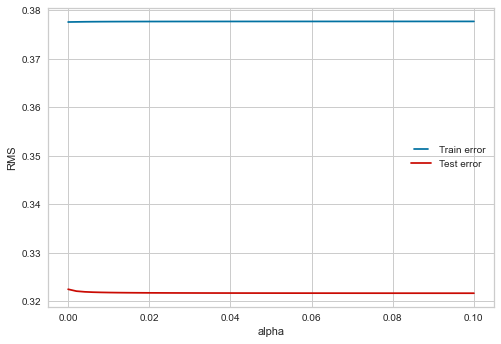

In [5]:
n_estimators = np.linspace(1e-08, 0.1, 50, endpoint=True)
train_results = []
test_results = []
for eta in n_estimators:
    model = Ridge(alpha=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train error")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('alpha')
plt.show()


## max_iterations

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

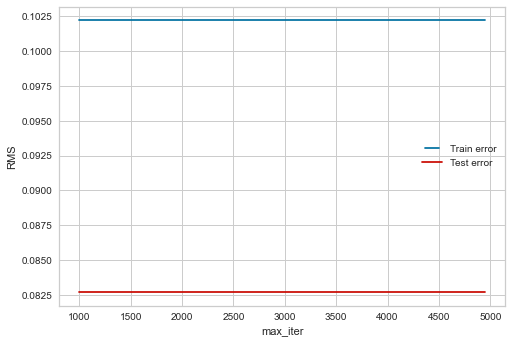

In [76]:
n_estimators = np.arange(1000,5000,50)
train_results = []
test_results = []
for eta in n_estimators:
    model = Ridge(max_iter=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train error")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('max_iter')
plt.show()

## Random Hyperparameter Grid
### Randomized search 

In [9]:
X=Data[features]
y=Data[Rib6]

In [4]:
#Chest deflection:
# alpha = np.linspace(1e-06, 0.1, 50, endpoint=True)
# max_iter= np.arange(200,5000,100)

# Neck force
# alpha = np.linspace(1e-06, 0.1, 50, endpoint=True)
# max_iter= np.arange(200,5000,100)


#Head accleration
# alpha = np.linspace(1e-06, 0.1, 50, endpoint=True)
# max_iter= np.arange(200,5000,100)


# HIC15
alpha = np.linspace(1e-08, 0.1, 100, endpoint=True)
max_iter= np.arange(200,5000,100)


random_grid = {"alpha" :alpha,
               "max_iter":max_iter}
               
        

In [5]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
y_t=np.log(y)
rf = Ridge()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=12, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,y_t)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 560 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    8.5s finished


RandomizedSearchCV(cv=10, estimator=Ridge(), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-08, 1.01011091e-03, 2.02021182e-03, 3.03031273e-03,
       4.04041364e-03, 5.05051455e-03, 6.06061545e-03, 7.07071636e-03,
       8.08081727e-03, 9.09091818e-03, 1.01010191e-02, 1.11111200e-02,
       1.21212209e-02, 1.31313218e-02, 1.41414227e-02, 1.51515236e-02,
       1.61616245...
       9.29292936e-02, 9.39393945e-02, 9.49494955e-02, 9.59595964e-02,
       9.69696973e-02, 9.79797982e-02, 9.89898991e-02, 1.00000000e-01]),
                                        'max_iter': array([ 200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
       1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300,
       2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400,
       3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500,
       4600, 4700, 4800, 4900])},
                   random_state=12, verbose=2)

In [6]:
rf_random.best_params_

{'max_iter': 4800, 'alpha': 0.0030303127272727276}

In [7]:
rf_random.best_estimator_

Ridge(alpha=0.0030303127272727276, max_iter=4800)

In [8]:
#Rib1:
mode=Ridge(alpha=0.0030303127272727276, max_iter=4800)
mod = TransformedTargetRegressor(regressor=mode, func=np.log,inverse_func=np.exp)

C:\Users\Akhil Srinivas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


<Figure size 576x396 with 0 Axes>

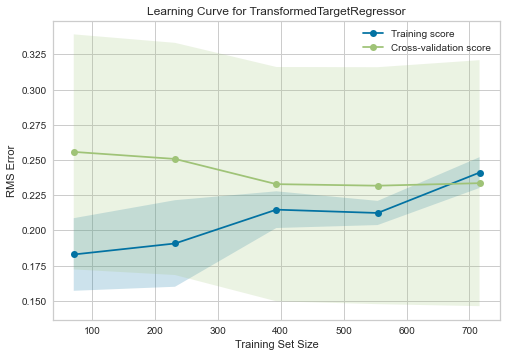

In [10]:
cv = KFold(n_splits=10, random_state=1)
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=12)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_root_mean_squared_error')
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

In [11]:
X = X.to_numpy()
y = y.to_numpy()
y_Test=y_Test.to_numpy()
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 0.271268

Root Mean squared error: 0.121248

Root Mean squared error: 0.164463

Root Mean squared error: 0.322131

Root Mean squared error: 0.196502

Root Mean squared error: 0.156939

Root Mean squared error: 0.176100

Root Mean squared error: 0.258973

Root Mean squared error: 0.238743

Root Mean squared error: 0.427470

error COV--->0    1.737748
dtype: float64  error mean --->0    0.07998
Name: mean, dtype: float64  error std --->0    0.138985
Name: std, dtype: float64


In [12]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    2.338594
dtype: float64  error mean --->0    0.095599
Name: mean, dtype: float64  error std --->0    0.223566
Name: std, dtype: float64


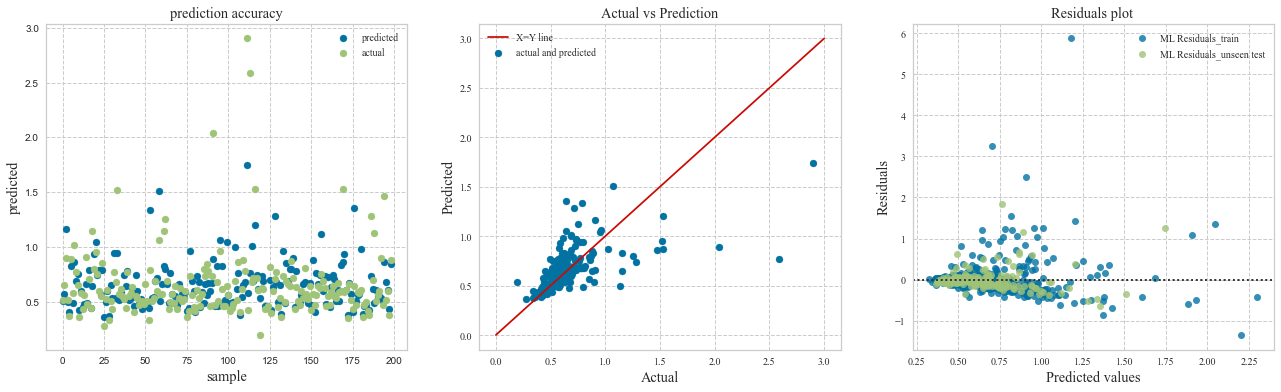

In [23]:
plt.figure(figsize=(22, 6))
csfont = {'fontname':'Times New Roman'}
plt.subplot(1,3,1)
plt.scatter(np.arange(0,len(ytestunk)),ytestunk,label='predicted')
plt.scatter(np.arange(0,len(y_Test)),y_Test,label='actual')
plt.grid( linestyle='--')
plt.title('prediction accuracy', fontsize='large',**csfont)
plt.xlabel('sample', fontsize='large',**csfont)
plt.ylabel('predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,2)
plt.scatter(y_Test,ytestunk,label='actual and predicted')
plt.plot([0,3],[0,3],color='r',label='X=Y line')
plt.grid( linestyle='--')
plt.title('Actual vs Prediction', fontsize='large',**csfont)
plt.xlabel('Actual', fontsize='large',**csfont)
plt.ylabel('Predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,3)
a=sns.residplot(y=abs(y), x=abs(ytr),label='ML Residuals_train')
r=sns.residplot(y=abs(y_Test), x=abs(ytestunk),label='ML Residuals_unseen test')
plt.grid( linestyle='--')
plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.show()

# Grid search

In [109]:
# # Hyperparameter values of Random Forest to input to the GridSearchCV

#chest deflection
# alpha = np.linspace(1e-07, 1e-06, 20, endpoint=True)
# max_iter= np.arange(4000,5000,100)


#Neck force
# alpha = np.linspace(0.09,0.1, 20, endpoint=True)
# max_iter= np.arange(4000,5000,100)


#Head acceleration
# alpha = np.linspace(1e-07, 1e-06, 10, endpoint=True)
# max_iter= np.arange(4000,5000,100)


#HIC15
alpha = np.linspace(1e-07, 1e-06, 10, endpoint=True)
max_iter= np.arange(4000,5000,100)


random_grid = {"alpha" :alpha,
               "max_iter":max_iter}
               

In [117]:
Data=pd.read_csv('Result_dataset_130.csv')
Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]
features = Data.columns[0:13]
X=Data[features]
y=Data[Head]

In [111]:
rf = Ridge()
reg = GridSearchCV(rf,param_grid = random_grid ,cv = cv, return_train_score=True,scoring="neg_root_mean_squared_error", verbose=2, n_jobs = -1)
reg.fit(X,y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 922 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.8s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=False),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.e-07, 2.e-07, 3.e-07, 4.e-07, 5.e-07, 6.e-07, 7.e-07, 8.e-07,
       9.e-07, 1.e-06]),
                         'max_iter': array([4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [112]:
reg.best_params_

{'alpha': 1e-07, 'max_iter': 4000}

In [118]:
#Chest deflection:
# mod=Ridge(alpha = 1e-07,max_iter = 4000)
#Neck
# mod=Ridge(alpha = 0.1,max_iter = 4000)

# Head acc
# mod=Ridge(alpha = 1e-07,max_iter = 4000)

## HIC
mod=Ridge(alpha = 1e-07,max_iter = 4000)


C:\Users\Akhil Srinivas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


<Figure size 576x396 with 0 Axes>

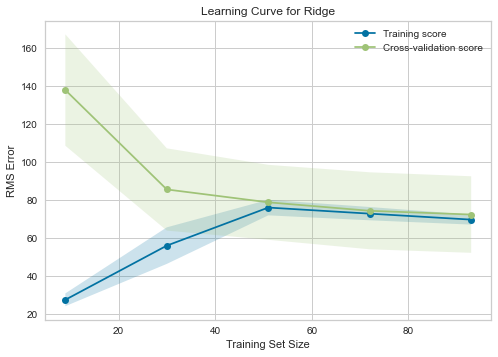

In [119]:
cv = KFold(n_splits=10, random_state=1)
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_root_mean_squared_error')
kf=cv
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

## Unknown data test

In [120]:
X = X.to_numpy()
y = y.to_numpy()
y_Test=y_Test.to_numpy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 79.939510

Root Mean squared error: 47.747652

Root Mean squared error: 89.569770

Root Mean squared error: 115.374672

Root Mean squared error: 77.134347

Root Mean squared error: 61.355887

Root Mean squared error: 86.133248

Root Mean squared error: 47.691519

Root Mean squared error: 55.843009

Root Mean squared error: 64.209896

error COV--->0    0.868545
dtype: float64  error mean --->0    63.656159
Name: mean, dtype: float64  error std --->0    55.288252
Name: std, dtype: float64


# train score

In [121]:
ytestunk=HBM_Train.predict(X)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    0.910331
dtype: float64  error mean --->0    52.031129
Name: mean, dtype: float64  error std --->0    47.365558
Name: std, dtype: float64


In [107]:
# define model evaluation method
cv = KFold(n_splits=10,random_state=1)
# evaluate model
scores = cross_val_score(mod, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

Mean MAE: 0.135 (0.041)


C:\Users\Akhil Srinivas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
